### Current Goal -> Strictly Analyze Baseline Data from Mothers

### Importing Necessary Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [22]:
polar_data = pd.read_csv("../HRV108M/HRV108M_Finger_Relaxed/polar.csv")
polar_data.head()

,timestamp_ms,value
0,5.996178e+11,109
1,5.996178e+11,92
2,5.996178e+11,78
3,5.996178e+11,80
4,5.996178e+11,80


### Normalizing Timestamps and Plotting Raw Data

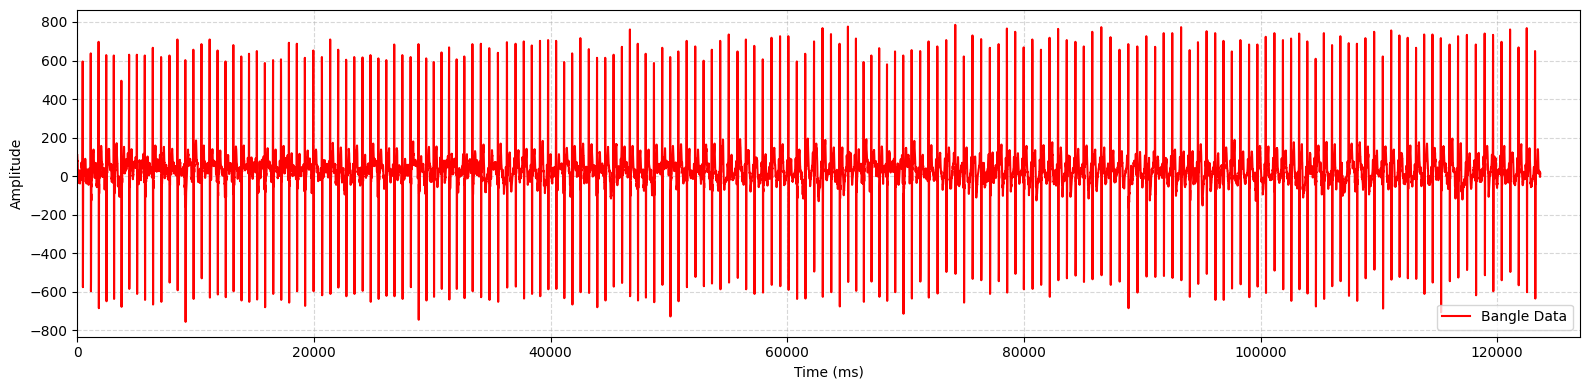

In [23]:
timestamps = polar_data["timestamp_ms"].to_numpy()
ecg_raw = polar_data["value"].to_numpy()

' Normalizing timestamp (ms), such that it starts from 0 ms'
t0 = polar_data["timestamp_ms"].iloc[0]
timestamps = timestamps - t0

plt.figure(figsize=(16, 4))
plt.plot(timestamps, ecg_raw, c='r', label="Bangle Data")
plt.grid(which='both', axis='both', linestyle='--', alpha=0.5)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(left=0, right=127000)
plt.tight_layout()
plt.show()

### Filtering With Old Method and Plotting Filtered Data

In [24]:
dt = np.diff(timestamps) / 1000.0
fs = 1 / np.mean(dt)
print(f"Estimated PPG sampling rate: {fs:.1f} Hz")

'''Removing Filter Temporarily, as our ECG data has historically performed better with No Filter!'''

# from scipy.signal import butter

# lowcut, highcut = 0.5, 8.0
# nyq = 0.5 * fs
# b, a = butter(3, [lowcut/nyq, highcut/nyq], btype='band')

# from scipy.signal import filtfilt

# ecg_filt = filtfilt(b, a, ecg_raw)

# plt.figure(figsize=(16, 4))
# plt.plot(timestamps, ecg_filt, c='r', label="Bangle Data")
# plt.grid(which='both', axis='both', linestyle='--', alpha=0.5)
# plt.xlabel("Time (ms)")
# plt.ylabel("Amplitude")
# plt.legend()
# plt.xlim(left=0, right=127000)
# plt.tight_layout()
# plt.show()

Estimated PPG sampling rate: 129.9 Hz


'Removing Filter Temporarily, as our ECG data has historically performed better with No Filter!'

### Finding Peaks With Old Method

Detected 176 peaks in the Filtered PPG


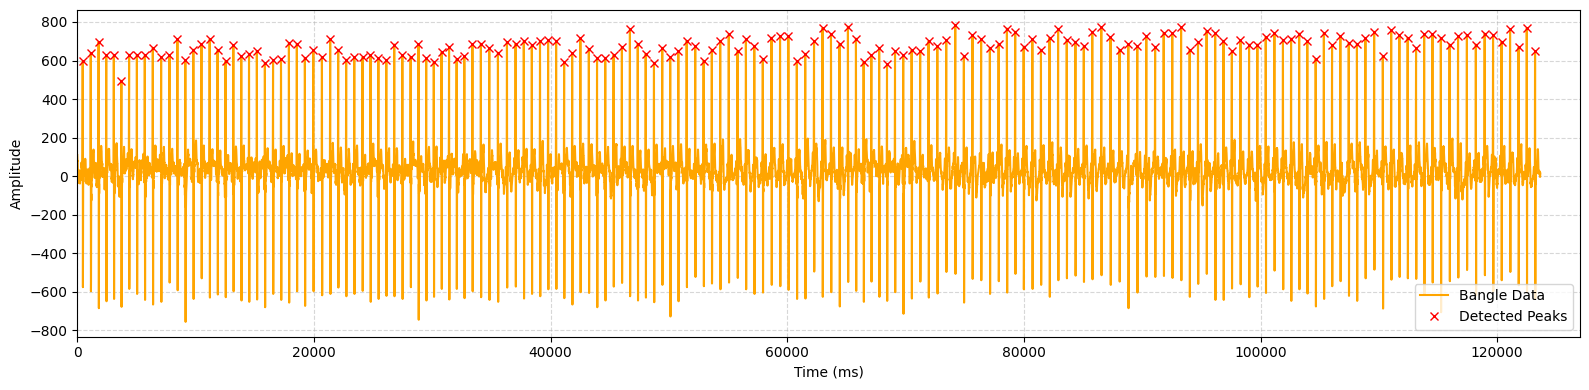

In [25]:
from scipy.signal import find_peaks

min_dist = int(0.5 * fs)
peaks, props = find_peaks(ecg_raw, distance=min_dist, height=np.mean(ecg_raw))

print(f"Detected {len(peaks)} peaks in the Filtered PPG")

plt.figure(figsize=(16, 4))
plt.plot(timestamps, ecg_raw, c='orange', label="Bangle Data")
plt.plot(timestamps[peaks], ecg_raw[peaks], 'x', c='red', label="Detected Peaks")
plt.grid(which='both', axis='both', linestyle='--', alpha=0.5)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(left=0, right=127000)
plt.tight_layout()
plt.show()

### New Method